In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("amazon_alexa.tsv",sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


No Null values

In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


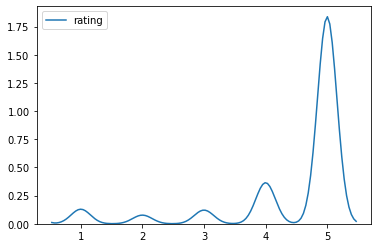

In [5]:
sns.kdeplot(df['rating'])

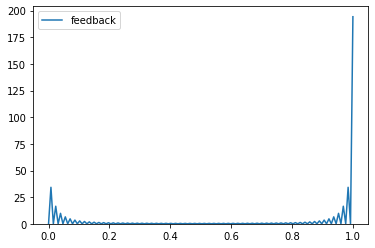

In [6]:
sns.kdeplot(df['feedback'])

In [7]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

Positive reviews> negative reviews

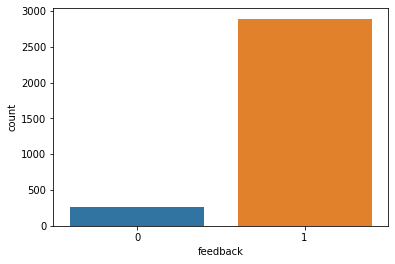

In [8]:
sns.countplot(df['feedback'])

In [9]:
df["length"]=df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


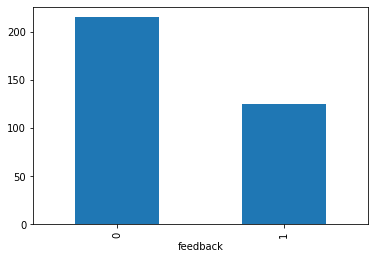

In [10]:
df.groupby("feedback").length.mean().plot(kind="bar");

People with negative review have written longer reviews.

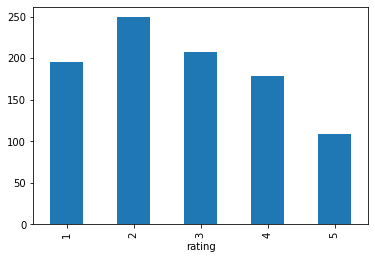

In [11]:
df.groupby("rating").length.mean().plot(kind="bar");

Customers who have given 5 star rating have given shorter reviews and customers who have given rating 2 have given longer reviews, which is not according to the trend that lesser rating more length.

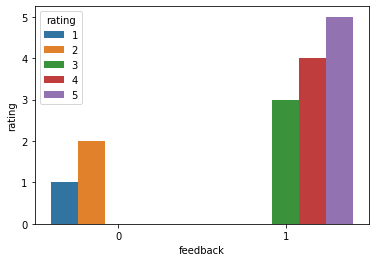

In [12]:
sns.barplot(x=df['feedback'],y=df['rating'],hue=df['rating'])

People with rating 3,4,5 have give positive feedbacks for Alexa, despite their issues.

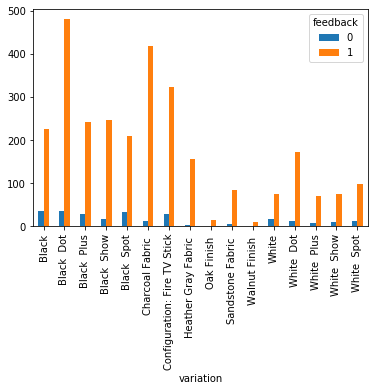

In [13]:
pd.crosstab(df['variation'],df['feedback']).plot(kind='bar')

We see that black dot and charcoal fabric, fire tv stick have the highest postive feedbacks

In [14]:
df['date']=df['date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
length              3150 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.7+ KB


In [15]:
 df['month']=pd.DatetimeIndex(df['date']).month

In [16]:
 df['month'].value_counts()

7    2913
6     155
5      82
Name: month, dtype: int64

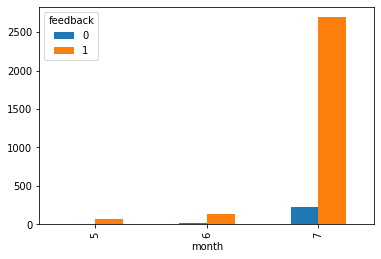

In [17]:
pd.crosstab(df['month'],df['feedback']).plot(kind='bar')

We see that the majority of the data collected is from the month July.

# Text Analysis

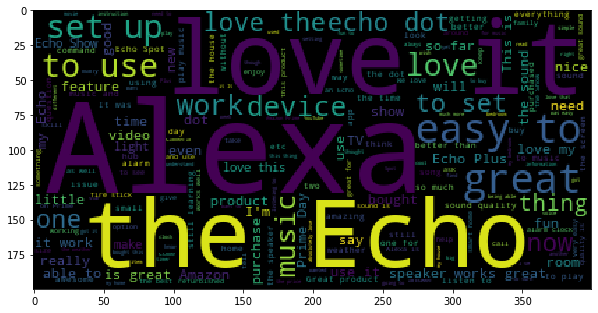

In [18]:
pos=df[df.feedback==1].verified_reviews.unique().tolist()
pos=" ".join(pos)
from wordcloud import WordCloud
wc=WordCloud().generate(pos)
wc
plt.figure(figsize=(10,8))
plt.imshow(wc)

Above is the word cloud for postive feedbacks

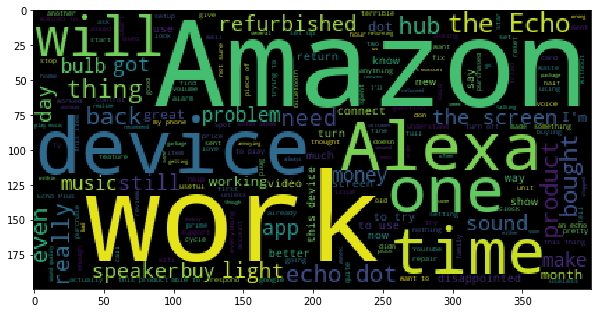

In [19]:
neg=df[df.feedback==0].verified_reviews.unique().tolist()
neg=" ".join(neg)
from wordcloud import WordCloud
wc=WordCloud().generate(neg)
plt.figure(figsize=(10,8))
plt.imshow(wc)

Word cloud for negaive feedbacks.

Since most words are common in both the word clouds, we remove it by including them in the stop words

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["Amazon","device","Alexa","one","Echo","work","product","amazon","alexa","thing","echo","dot","use"])

There are a couple of extra non alphabetic characters and numbers present in the review section. So we need to remove those undesirable characters for creating a better model. 

In [21]:
df.verified_reviews=df.verified_reviews.str.lower()

In [22]:
df.verified_reviews=df.verified_reviews.str.replace("[^a-z]"," ")

In [23]:
df.verified_reviews=df.verified_reviews.str.split()

In [24]:
df.verified_reviews=df.verified_reviews.apply(lambda x:[word for word in x if word not in stop])

In [25]:
df.verified_reviews=df.verified_reviews.apply(lambda x: " ".join(word for word in x))

Now the stopwords and common word has been removed. We can keep on adding irrelevant word to stop list and run the code again for better model creation

Again Creating wordcloud

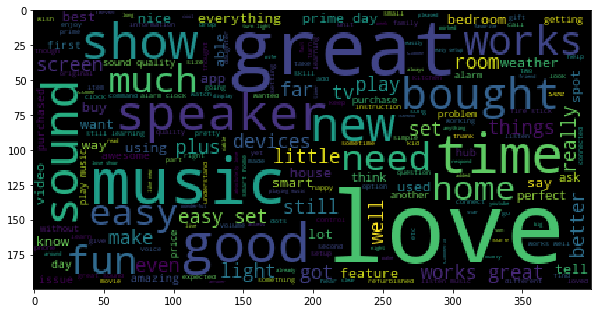

In [26]:
#Positive words
pos=df[df.feedback==1].verified_reviews.unique().tolist()
pos=" ".join(pos)
from wordcloud import WordCloud
wc=WordCloud().generate(pos)
plt.figure(figsize=(10,8))
plt.imshow(wc)

Word cloud for positive reviews after removing common words

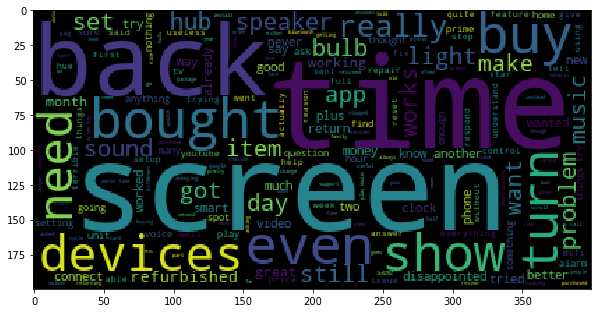

In [27]:
#Negative words
neg=df[df.feedback==0].verified_reviews.unique().tolist()
neg=" ".join(neg)
from wordcloud import WordCloud
wc=WordCloud().generate(neg)
plt.figure(figsize=(10,8))
plt.imshow(wc)

Negative Word cloud after removing common words

In [28]:
df.verified_reviews=df.verified_reviews.str.split()

In [29]:
from nltk.stem import WordNetLemmatizer
wll=WordNetLemmatizer()
df.verified_reviews=df.verified_reviews.apply(lambda x:[wll.lemmatize(word) for word in x])

In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df.verified_reviews=df.verified_reviews.apply(lambda x:" ".join([ps.stem(word) for word in x]))

In [31]:
df.head(10)

,rating,date,variation,verified_reviews,feedback,length,month
0,5,2018-07-31,Charcoal Fabric,love,1,13,7
1,5,2018-07-31,Charcoal Fabric,love,1,9,7
2,4,2018-07-31,Walnut Finish,sometim play game answer question correctli sa...,1,195,7
3,5,2018-07-31,Charcoal Fabric,lot fun yr old learn dinosaur control light pl...,1,172,7
4,5,2018-07-31,Charcoal Fabric,music,1,5,7
5,5,2018-07-31,Heather Gray Fabric,receiv gift need anoth bluetooth someth play m...,1,172,7
6,3,2018-07-31,Sandstone Fabric,without cellphon cannot mani featur ipad see g...,1,365,7
7,5,2018-07-31,Charcoal Fabric,think th purchas work get everi room hous real...,1,221,7
8,5,2018-07-30,Heather Gray Fabric,look great,1,11,7
9,5,2018-07-30,Heather Gray Fabric,love listen song heard sinc childhood get news...,1,114,7


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df.verified_reviews)
X=X.toarray()

In [33]:
y=df.feedback.tolist()
y=np.asarray(y)

In [34]:
y.shape,X.shape

((3150,), (3150, 2760))

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred_dc=dc.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
DT_accuracy=accuracy_score(y_test,y_pred_dc)

In [40]:
y_pred_rf=rc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
RF_accuracy=accuracy_score(y_test,y_pred_rf)

In [42]:
print("Decision Tree Accuracy=",DT_accuracy)
print("Random Forest=",RF_accuracy)

Decision Tree Accuracy= 0.9158730158730158
Random Forest= 0.9507936507936507
